In [2]:
from train import train_net, load_model, load_sess
from audio_reader import AudioReader
from model import AutoEncoderModel
import helper as hp
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Resultats Notes sintetiques

In [2]:
net = AutoEncoderModel(batch_size = 8, histograms = True)
reader = AudioReader(audio_dir='data', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, cost_squared = train_net(net, reader, reader.total_data, error = 'squared')

100%|██████████| 432110/432110 [2:18:50<00:00, 51.87it/s]


saving model:logdir/AE_A/2017-01-13T19-35-14/autoencoder_audio.ckpt-432109...
Optimization Finished!
Total errors: 0


In [3]:
net = AutoEncoderModel(batch_size = 8, histograms = True)
reader = AudioReader(audio_dir='data', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, saver = load_sess(net, reader,'logdir/AE_A/2017-01-13T19-35-14')

Trying to restore saved checkpoints from logdir/AE_A/2017-01-13T19-35-14 ...  Checkpoint found: logdir/AE_A/2017-01-13T19-35-14/autoencoder_audio.ckpt-432109
  Global step was: 432109
  Restoring... Done.


In [4]:
audio_original = reader.get_batch_test()
audio_recuperat = sess.run(net.output, feed_dict={net.x: audio_original , net.keep_prob: 1.})
print np.shape(audio_original)

(49625, 1024)


In [22]:
best = hp.best_results(audio_original, audio_recuperat)
print "mean snr: ", np.mean([x[0] for x in best]), "mean squared: ",np.mean([x[1] for x in best])
print len(best)

mean snr:  43.4635961206 mean squared:  0.000367153796081
36615


In [26]:
_1,_2,_3,_4,_5,_6 = -1,-10000, -20000, 1000, 8, 0
indexos = [best[_1][2], best[_2][2], best[_3][2], best[_4][2], best[_5][2], best[_6][2]]
info_mostra = [best[_1], best[_2], best[_3], best[_4], best[_5], best[_6]]
info_mostra

[(57.808999561654836, 4.0321844376075308e-05, 14123),
 (51.655908604142539, 8.258964331510059e-05, 20700),
 (43.534283658042163, 0.00020897089908011673, 43023),
 (29.243717706453332, 0.001073203694767244, 23291),
 (22.349026707107598, 0.0023833418981331865, 18926),
 (-0.03420496666897125, 0.031340511613188529, 9340)]

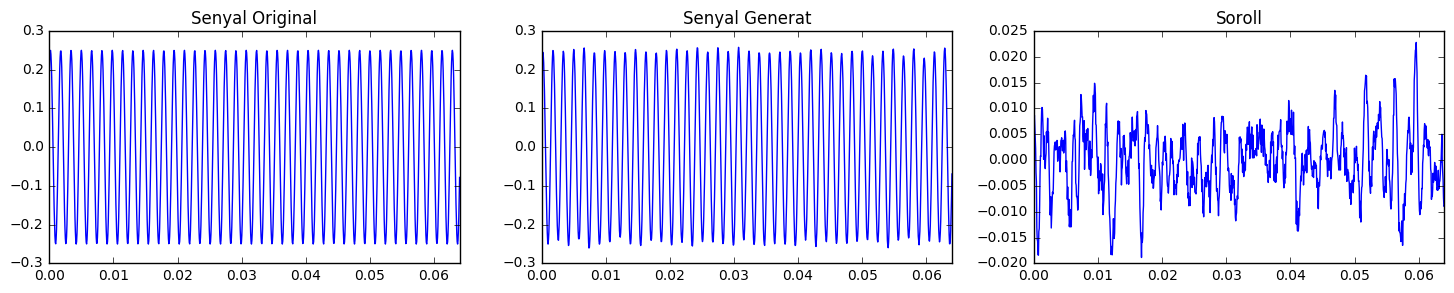

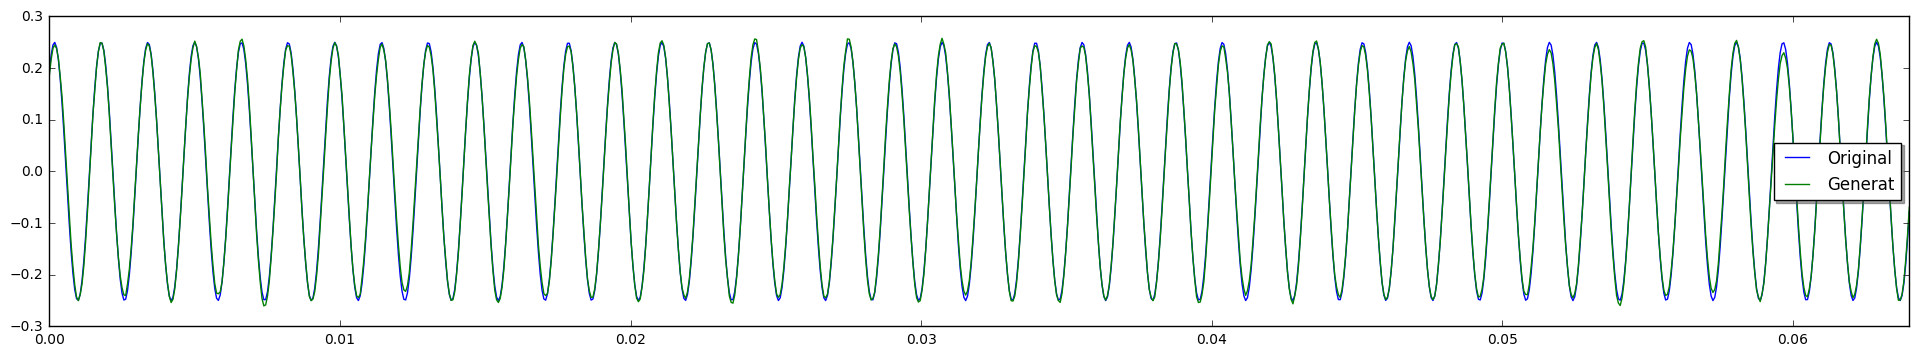

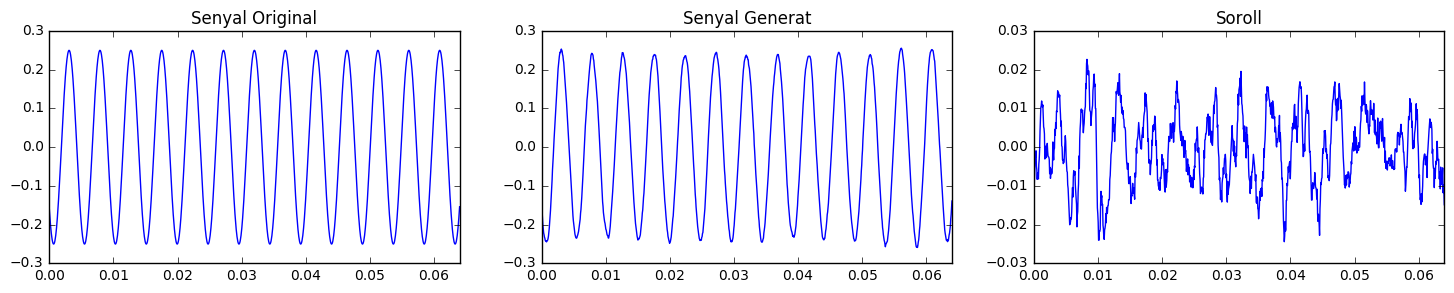

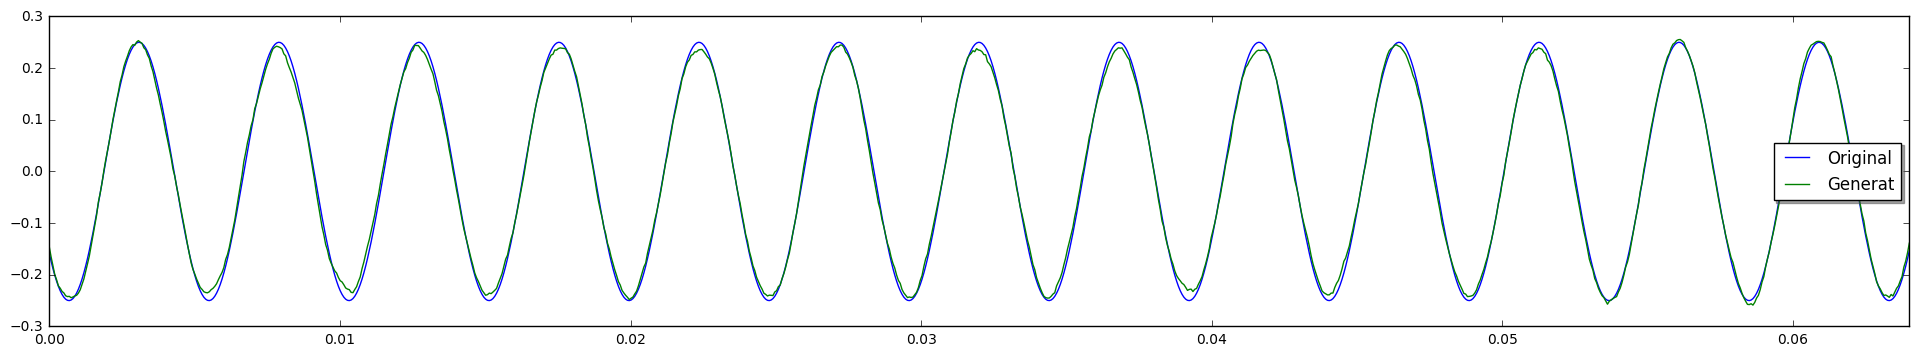

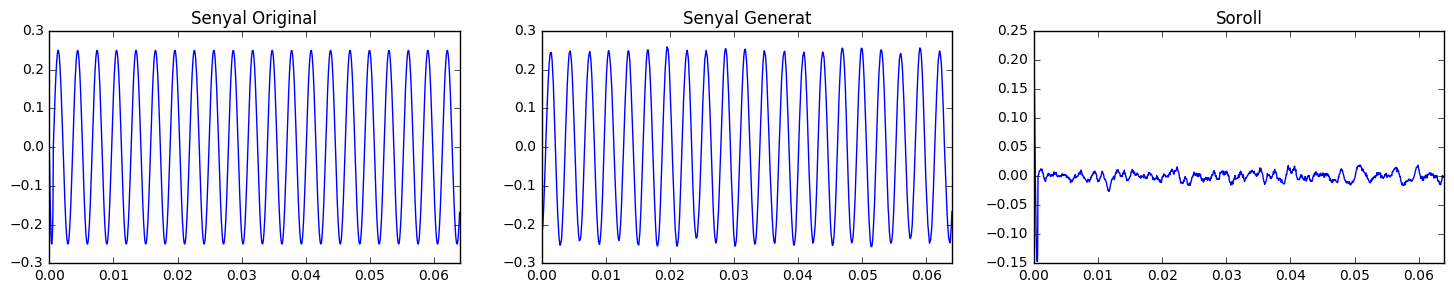

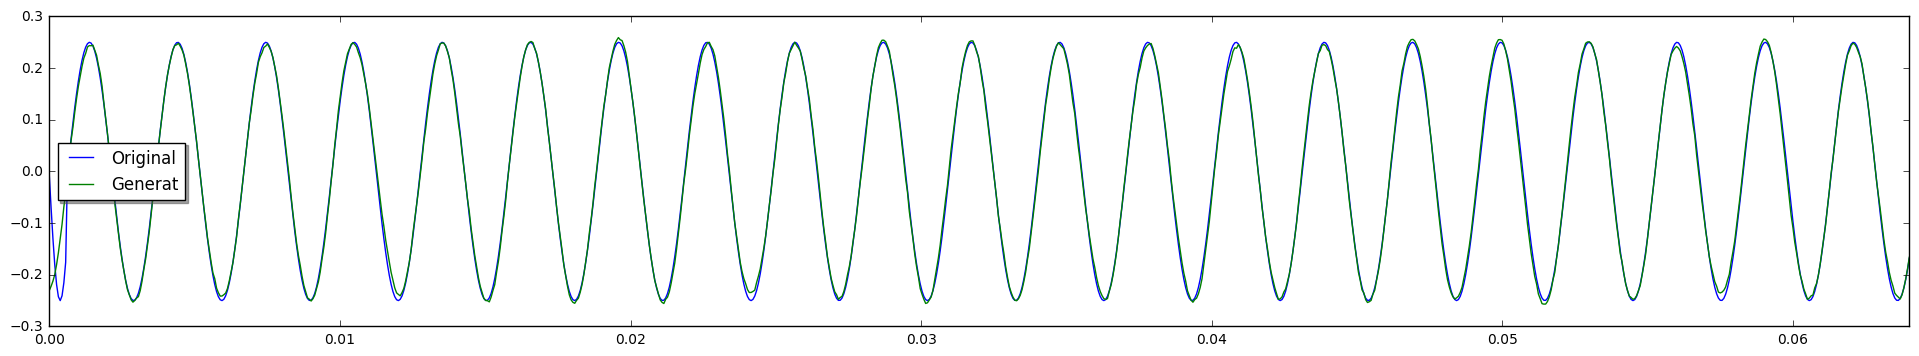

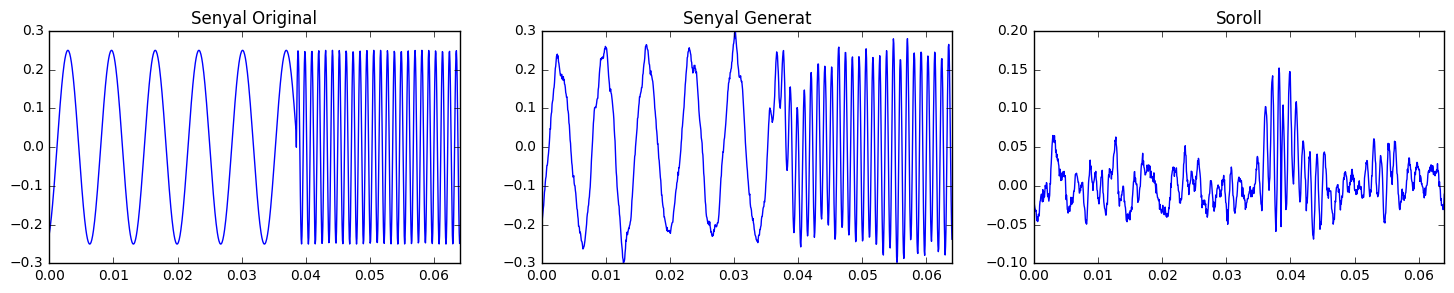

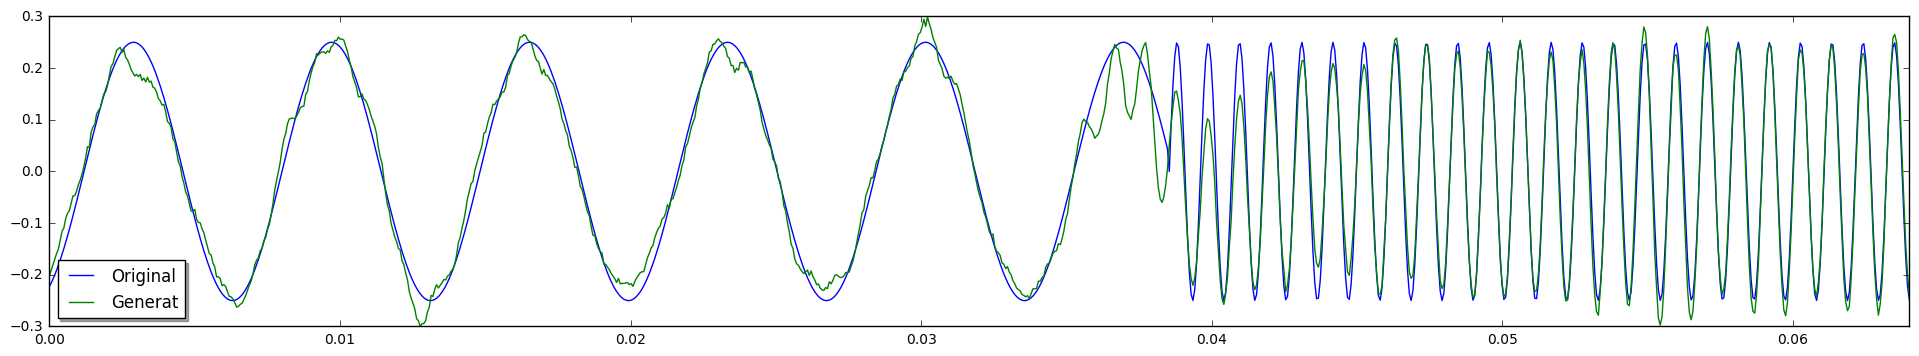

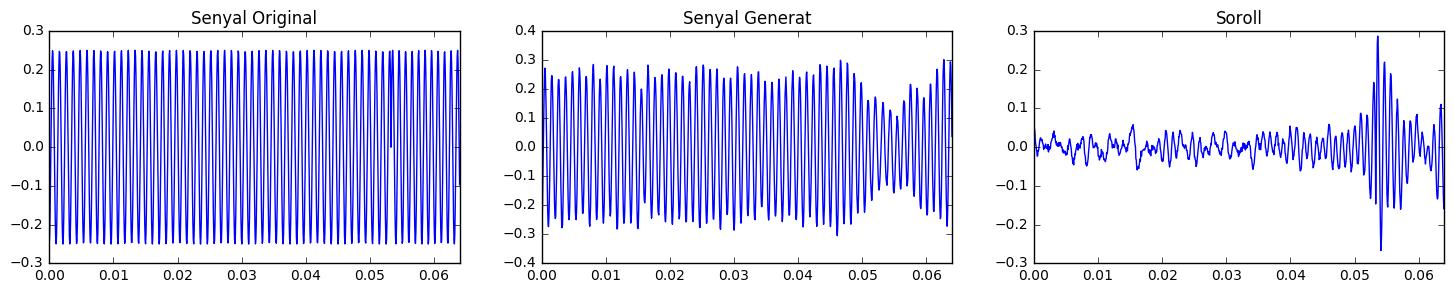

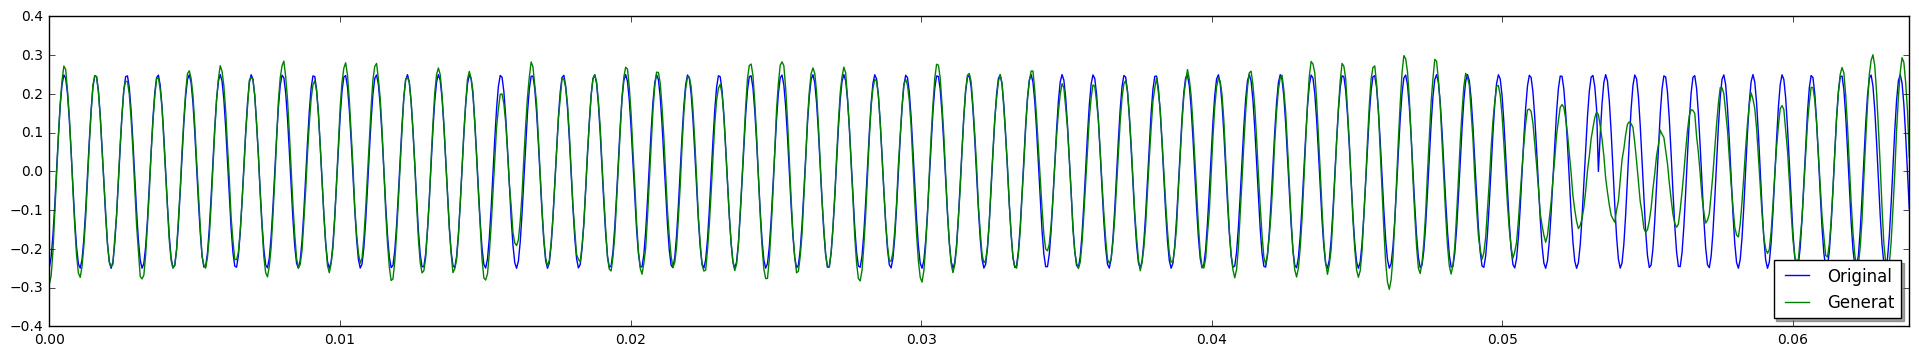

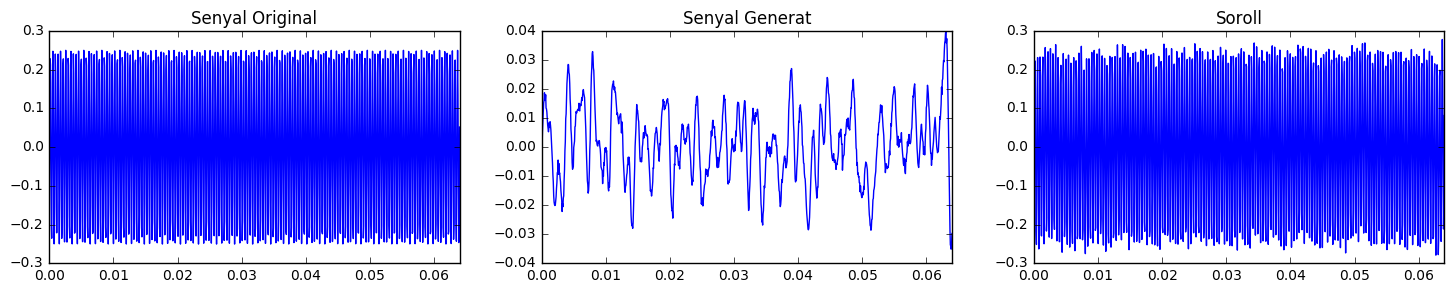

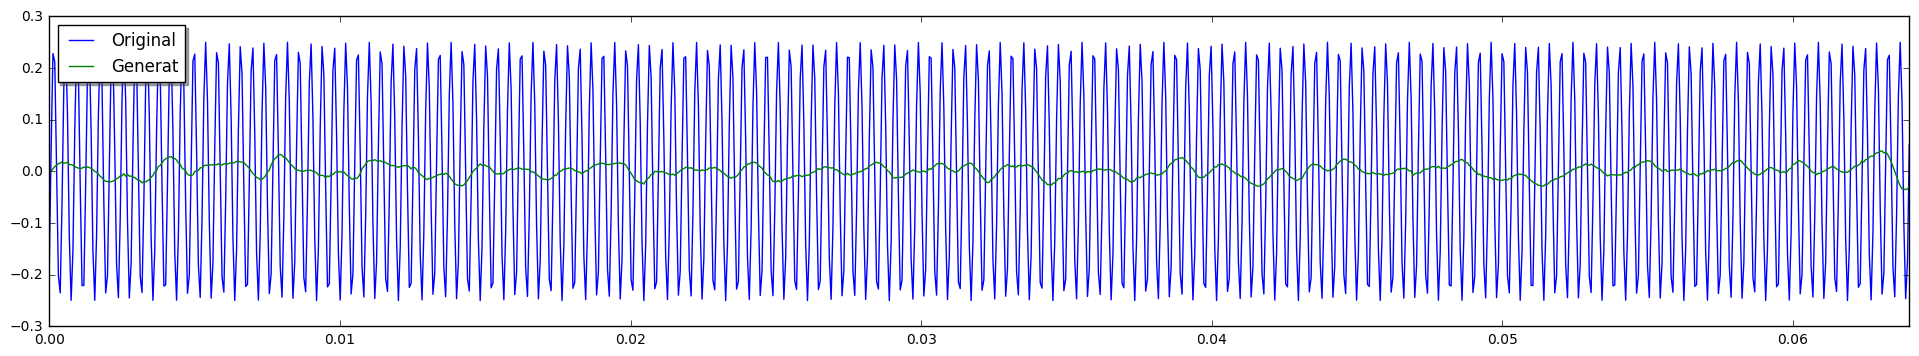

In [27]:
for index in indexos:
    hp.plot_wave(audio_original[index], audio_recuperat[index])
    hp.mult_plot_wave(audio_original[index], audio_recuperat[index])

In [28]:
sess.close()
tf.reset_default_graph() 

# Resultats sons de tennis

In [ ]:
net = AutoEncoderModel(batch_size = 8, histograms = True)
reader = AudioReader(audio_dir='../WaveNet/corpus/', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, cost_squared = train_net(net, reader, reader.total_data, error = 'squared')

100%|██████████| 2588190/2588190 [29:18:30<00:00, 24.53it/s]


saving model:logdir/AE_A/2017-01-13T22-44-05/autoencoder_audio.ckpt-2588189...
Optimization Finished!
Total errors: 0


In [29]:
net = AutoEncoderModel(batch_size = 8, histograms = True)
reader = AudioReader(audio_dir='../WaveNet/corpus/', sample_rate=16000, sample_size=1024, size_queue = 500)
sess, saver = load_sess(net, reader,'logdir/AE_A/2017-01-13T22-44-05')

Trying to restore saved checkpoints from logdir/AE_A/2017-01-13T22-44-05 ...  Checkpoint found: logdir/AE_A/2017-01-13T22-44-05/autoencoder_audio.ckpt-2588189
  Global step was: 2588189
  Restoring... Done.


In [30]:
audio_original = reader.get_batch_test()
len(audio_original)

289847

In [31]:
audio_recuperat = sess.run(net.output, feed_dict={net.x: audio_original , net.keep_prob: 1.})

In [53]:
best = hp.best_results(audio_original, audio_recuperat)
print "mean snr: ", np.mean([x[0] for x in best[1:]]), "mean squared: ",np.mean([x[1] for x in best[1:]])
print len(best)

mean snr:  12.2024518243 mean squared:  0.000687140980497
289075


In [74]:
_1,_2,_3,_4,_5,_6 = -1,-10000, -50000, 40000, 10000, 0
indexos = [best[_1][2], best[_2][2], best[_3][2], best[_4][2], best[_5][2], best[_6][2]]
info_mostra = [best[_1], best[_2], best[_3], best[_4], best[_5], best[_6]]
info_mostra

[(35.754409389265952, 5.1689029289816719e-05, 81046),
 (26.71939283278196, 1.4588951298227871e-05, 275481),
 (20.146353670526928, 0.00036403829231337008, 250931),
 (3.0418446437775004, 0.0018239195251549135, 89499),
 (0.21011057898159152, 3.3959640847479931e-06, 201942),
 (-inf, 7.1337680100084633e-07, 88)]

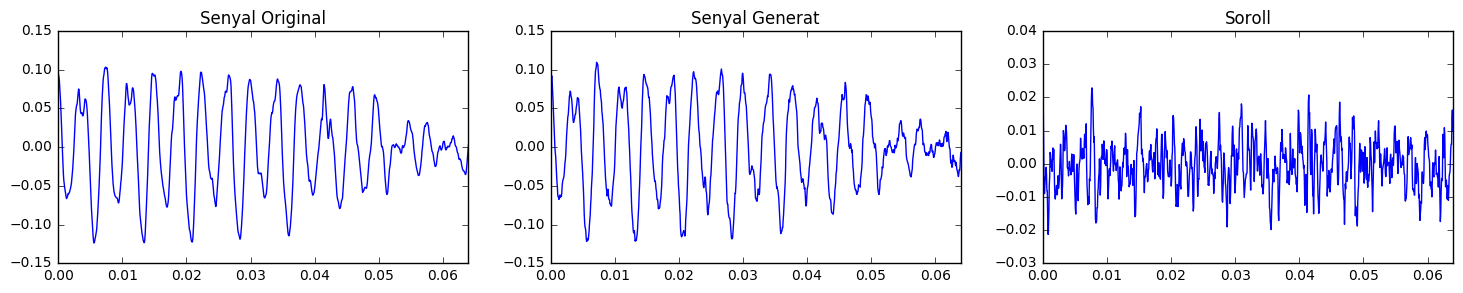

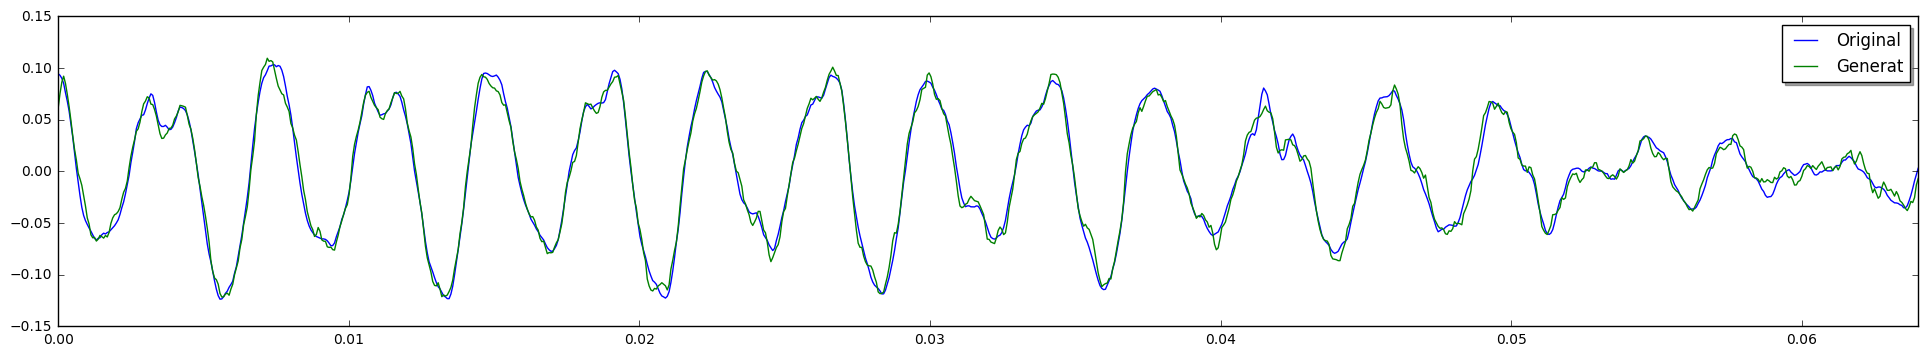

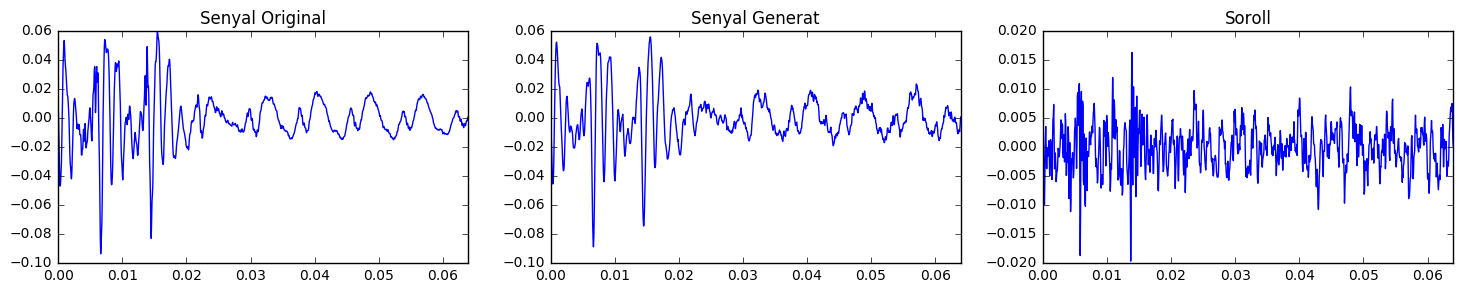

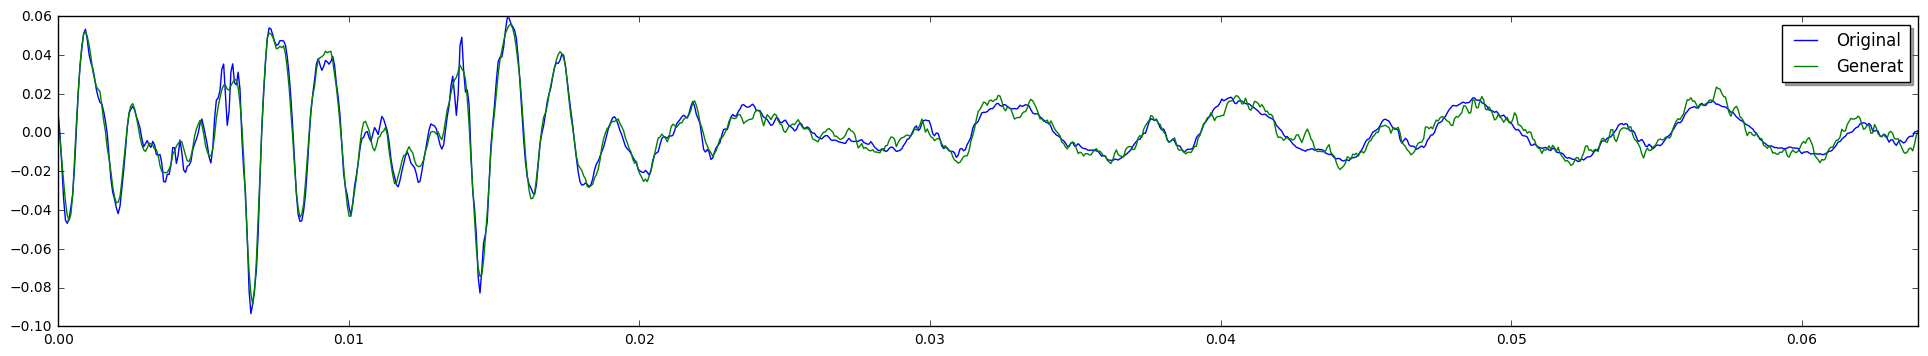

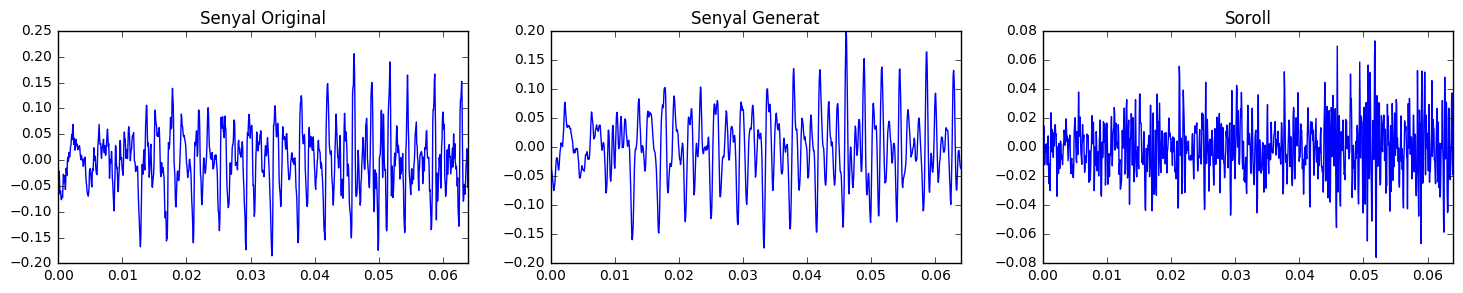

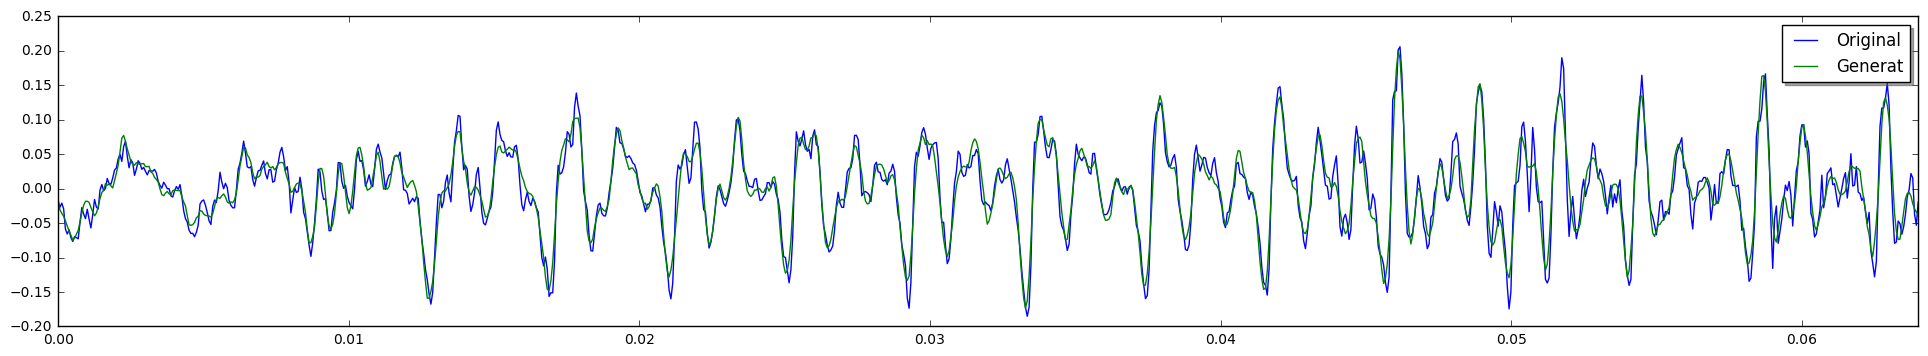

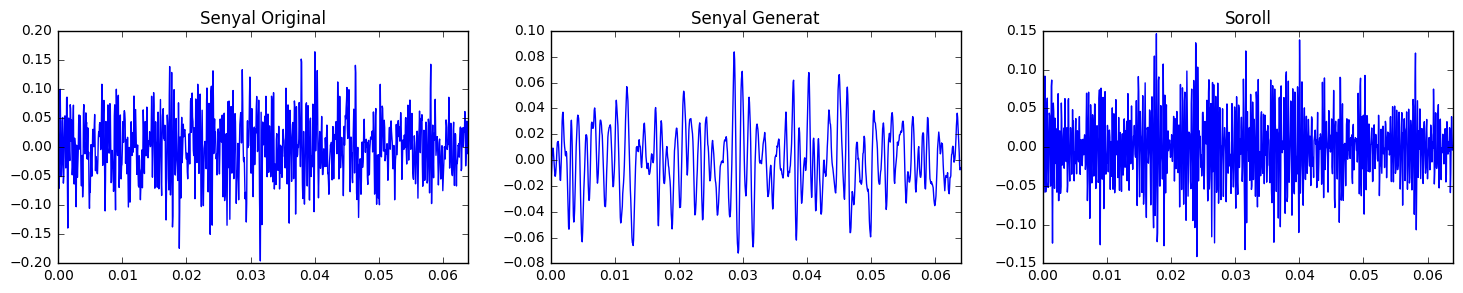

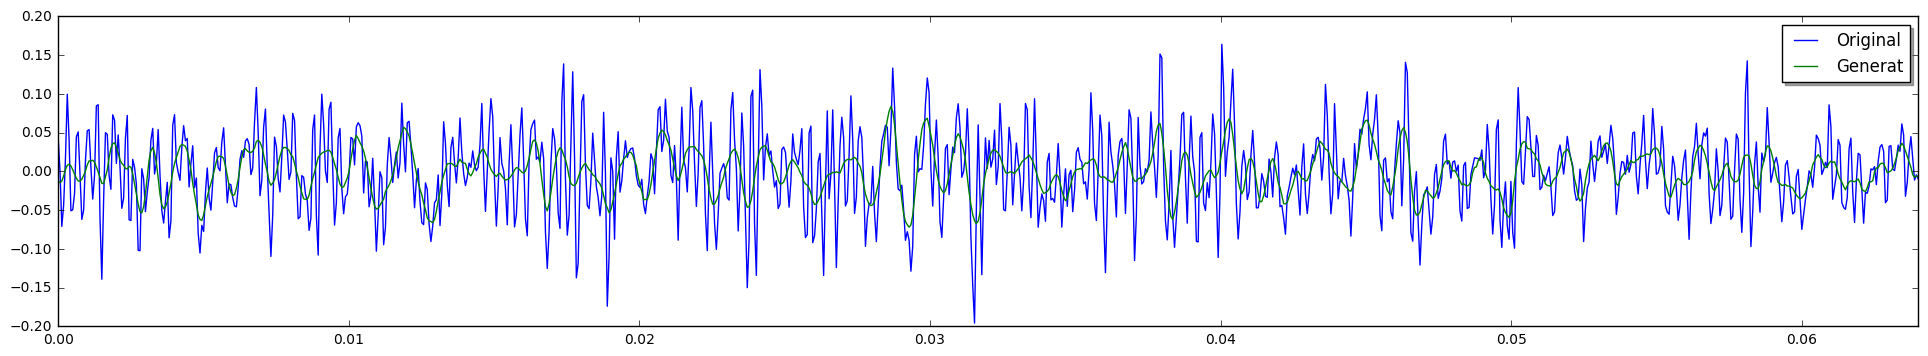

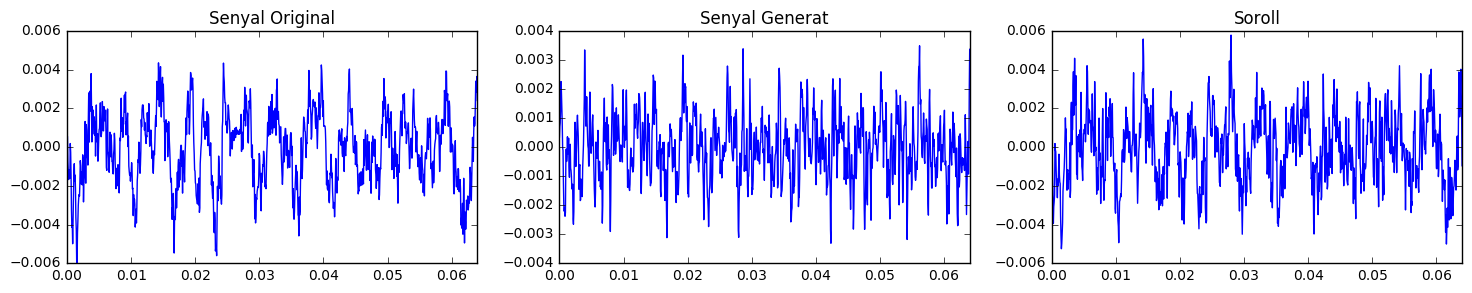

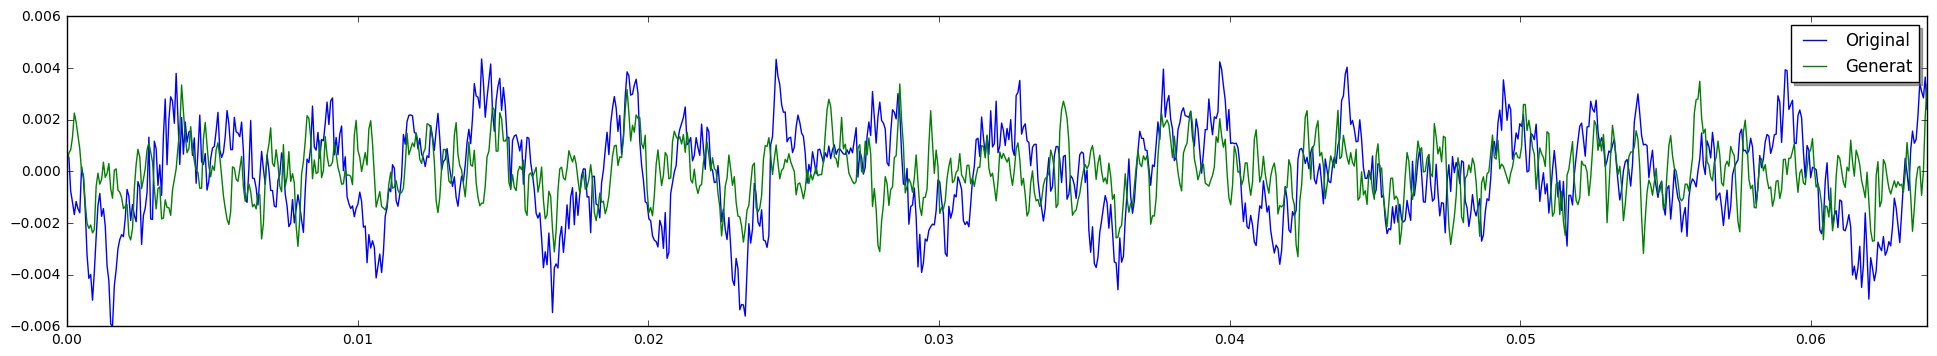

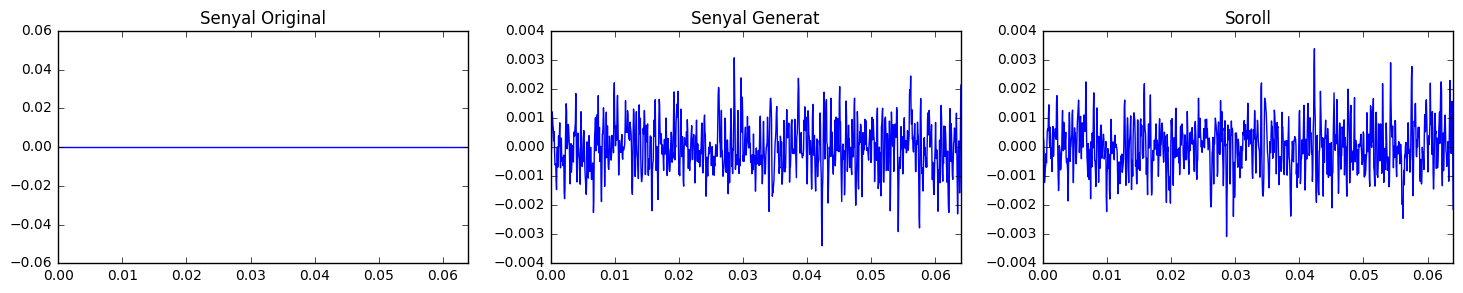

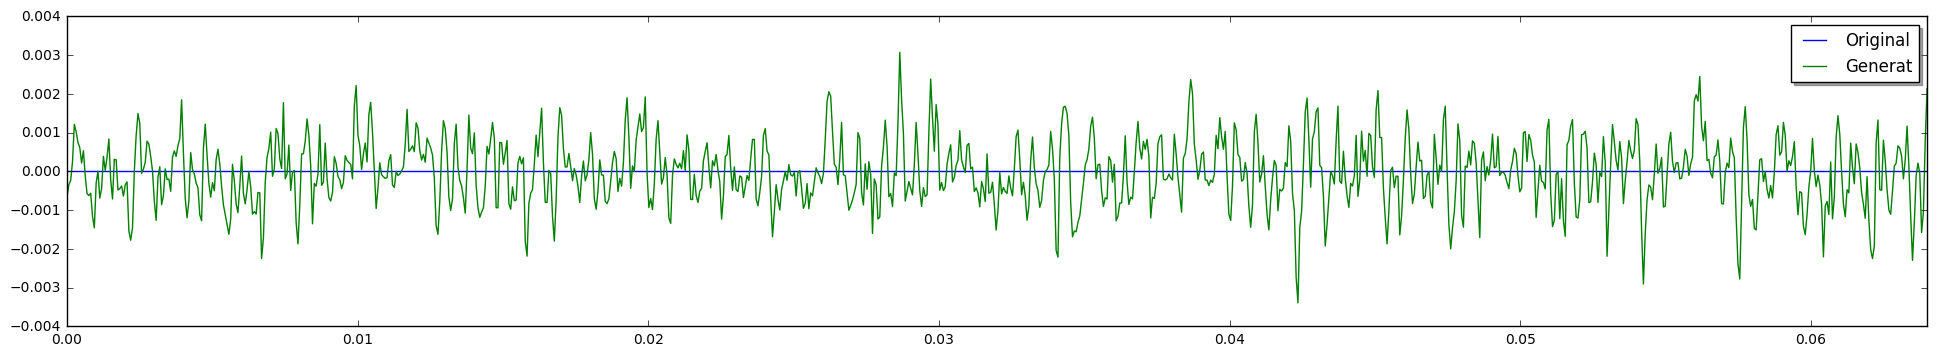

In [75]:
for index in indexos:
    hp.plot_wave(audio_original[index], audio_recuperat[index])
    hp.mult_plot_wave(audio_original[index], audio_recuperat[index])

In [8]:
sess.close()
tf.reset_default_graph() 